In [205]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.interpolate import interp1d
import scipy.misc as misc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from uncertainties import ufloat
from uncertainties import unumpy

def model(x, m, b):
    return m * x + b

def get_x_int(m, b):
    return -b / m
    
def photo_function(x, stopping, slope):
    return np.piecewise(x, [x>stopping, x<=stopping], [lambda x: slope * (x - stopping), 0])

def push_xerr(x, xerr, y, yerr, fitted_model):
    pushed_xerr = xerr * misc.derivative(fitted_model, x)
    add_quad = np.sqrt(yerr ** 2 + pushed_xerr ** 2)
    return add_quad

def agreement(accepted, experimental):
    discrep = np.abs(accepted.n - experimental.n)
    acc_discrep = 2 * np.sqrt(accepted.s ** 2 + experimental.s ** 2)
    if discrep < acc_discrep:
        sign = "<"
    elif discrep > acc_discrep:
        sign = ">"
    else:
        sign = "="

    return print("|V_{acc} - V_{exp}| = ",  discrep, sign, acc_discrep, " = 2\sqrt{\\alpha_{acc}^2+\\alpha_{exp}^2}")


In [193]:
raw_mV_b = np.array([0.0, -100, -200, -300, -400, -500, -600, -700, -800, -850, -900, -925, -950, -975, -1000, -1100, 100, 200, 300, 400, 500])
raw_nA_b = np.array([4926, 4180, 3356, 2585, 1883, 1280, 789, 423, 178, 92, 47, 29, 14, 3, 0, 0, 6356, 7324, 8274, 9262, 10220])
raw_mV_b = np.sort(raw_mV_b)
raw_nA_b = np.sort(raw_nA_b)

mV_interp = interp1d(raw_mV_b, raw_nA_b, kind="linear")
start_x = raw_mV_b[0]
stop_x = raw_mV_b[-1]
step_size = int((stop_x - start_x) / 25)
mV_b = np.arange(start_x, stop_x, step_size)
nA_b = mV_interp(mV_b)

raw_mV_r = np.array([0.0, -100, -200, -225, -250, -275, -300, -400, -600, 100, 200, 300, 400, 500])
raw_nA_r = np.array([318, 114, 21, 14, 7, 3, 0, 0, 0, 611, 902, 1188, 1473, 1739])
raw_mV_r = np.sort(raw_mV_r)
raw_nA_r = np.sort(raw_nA_r)

mV_interp = interp1d(raw_mV_r, raw_nA_r, kind="linear")
start_x = raw_mV_r[0]
stop_x = raw_mV_r[-1]
step_size = int((stop_x - start_x) / 25)
mV_r = np.arange(start_x, stop_x, step_size)
nA_r = mV_interp(mV_r)

raw_mV_g = np.array([0.0, -200, -400, -500, -600, -650, -700, -725, -750, 100, 200, 300, 400, 500])
raw_nA_g = np.array([2230, 1067, 276, 90, 23, 5, 3, 0, 0, 2887, 3511, 4135, 4752, 5369])
raw_mV_g = np.sort(raw_mV_g)
raw_nA_g = np.sort(raw_nA_g)  

mV_interp = interp1d(raw_mV_g, raw_nA_g, kind="linear")
start_x = raw_mV_g[0]
stop_x = raw_mV_g[-1]
step_size = int((stop_x - start_x) / 25)
mV_g = np.arange(start_x, stop_x, step_size)
nA_g = mV_interp(mV_g)


Calculated Stopping Voltage:  (-6.15±0.16)×10²


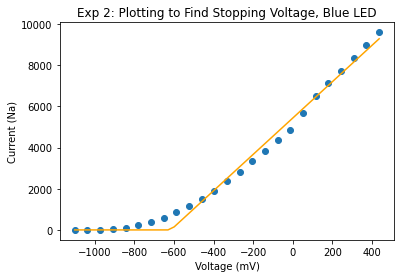

In [194]:
# Does the fit
init_params=[0,0]
lin_opt, lin_cov = opt.curve_fit(photo_function, mV_b, nA_b, p0=init_params)

# Best fit values
stopping_b, slope_b = lin_opt
dStopping_b, dSlope_b = np.sqrt(np.diag(lin_cov))

plt.title("Exp 2: Plotting to Find Stopping Voltage, Blue LED")
plt.ylabel("Current (Na)")
plt.xlabel("Voltage (mV)")
x_space = np.linspace(mV_b[0],mV_b[-1])
plt.scatter(mV_b, nA_b)
plt.plot(x_space, photo_function(x_space, stopping_b, slope_b), color='orange')

print("Calculated Stopping Voltage: ", u'{:.2eP}'.format(ufloat(stopping_b, dStopping_b)))

Calculated Stopping Voltage:  (-1.29±0.04)×10²


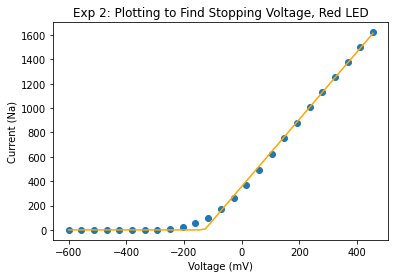

In [195]:
# Does the fit
init_params=[0, 0]
lin_opt, lin_cov = opt.curve_fit(photo_function, mV_r, nA_r, p0=init_params)

# Best fit values
stopping_r, slope_r = lin_opt
dStopping_r, dSlope_r = np.sqrt(np.diag(lin_cov))

plt.title("Exp 2: Plotting to Find Stopping Voltage, Red LED")
plt.ylabel("Current (Na)")
plt.xlabel("Voltage (mV)")
x_space = np.linspace(mV_r[0],mV_r[-1])
plt.scatter(mV_r, nA_r)
plt.plot(x_space, photo_function(x_space, stopping_r, slope_r), color='orange')

print("Calculated Stopping Voltage: ", u'{:.2eP}'.format(ufloat(stopping_r, dStopping_r)))

Calculated Stopping Voltage:  (-3.94±0.09)×10²


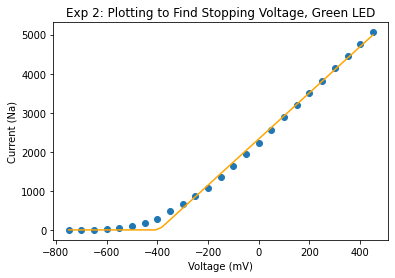

In [196]:
# Does the fit
init_params=[0, 0]
lin_opt, lin_cov = opt.curve_fit(photo_function, mV_g, nA_g, p0=init_params)

# Best fit values
stopping_g, slope_g = lin_opt
dStopping_g, dSlope_g = np.sqrt(np.diag(lin_cov))

plt.title("Exp 2: Plotting to Find Stopping Voltage, Green LED")
plt.ylabel("Current (Na)")
plt.xlabel("Voltage (mV)")
x_space = np.linspace(mV_g[0],mV_g[-1])
plt.scatter(mV_g, nA_g)
plt.plot(x_space, photo_function(x_space, stopping_g, slope_g), color='orange')

print("Calculated Stopping Voltage: ", u'{:.2eP}'.format(ufloat(stopping_g, dStopping_g)))

In [197]:
stopping = np.array([975, 700, 275]) * 10**-3
energy = 1.602176634e-19 * stopping * 6.242e+18
wavelength = np.array([463, 513, 618]) * 10**-9
freq = 299792458 / wavelength


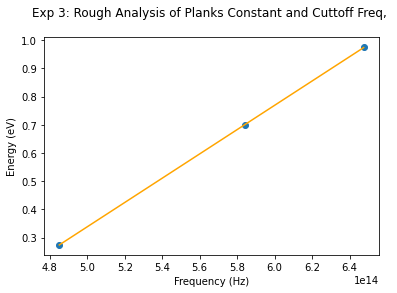

In [173]:
# Does the fit
init_params=[1e-16, 1e14]
lin_opt, lin_cov = opt.curve_fit(model, freq, energy, p0=init_params)
plt.title("Exp 3: Rough Analysis of Planks Constant and Cuttoff Freq, \n")


# Best fit values
m, b = lin_opt

plt.scatter(freq, energy)
plt.plot(freq, model(freq, m, b), color='orange')
# plt.plot(mV_g[6:], model(freq, m, b), color='orange')
plt.ylabel("Energy (eV)")
plt.xlabel("Frequency (Hz)")

plt.show()

In [174]:
stopping = -1 * np.array([stopping_b, stopping_g, stopping_r]) * 10**-3
stopping_err = np.array([dStopping_b, dStopping_g, dStopping_r]) * 10**-3
energy = 1.602176634e-19 * stopping * 6.242e+18
energy_err = 1.602176634e-19 * stopping_err * 6.242e+18
wavelength_unc = np.array([ufloat((592 + 423.2) / 2, (592 - 423.2) / 2), ufloat((650.3 + 462.2) / 2, (650.3 - 462.2) / 2), ufloat((670.8 + 580.6) / 2, (670.8 - 580.6) / 2)]) * 10**-9
freq_unc = 299792458 / wavelength_unc
freq = unumpy.nominal_values(freq_unc)
freq_err = unumpy.std_devs(freq_unc)


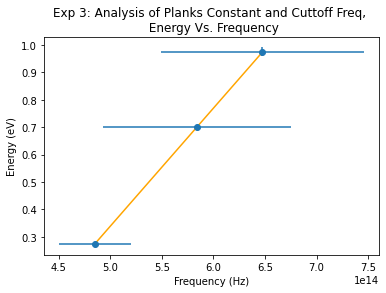

In [210]:
# Does naive the fit
init_params=[0, 0]
lin_opt, lin_cov = opt.curve_fit(model, freq, energy)
m, b = lin_opt

def fitted_lin(x):
    return model(x, m, b)

new_energy_err = push_xerr(freq, freq_err, energy, energy_err, fitted_lin)
                                 
lin_opt, lin_cov = opt.curve_fit(model, freq, energy, sigma=new_energy_err, absolute_sigma=True, p0=init_params)
plt.title("Exp 3: Analysis of Planks Constant and Cuttoff Freq, \n Energy Vs. Frequency")

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))
m_unc = ufloat(m, dm)
b_unc = ufloat(b, db)

plt.errorbar(freq, energy, xerr=freq_err, yerr=energy_err, fmt='o')
plt.plot(freq, model(freq, m, b), color='orange')
plt.ylabel("Energy (eV)")
plt.xlabel("Frequency (Hz)")

plt.show()

In [203]:
print(u'{:.2eP}'.format(get_x_int(m_unc, b_unc)))

(4.21±0.03)×10¹⁴


In [204]:
print(u'{:.2eP}'.format(m_unc))

(4.31±0.02)×10⁻¹⁵


In [206]:
agreement(get_x_int(m_unc, b_unc), ufloat(4.136e-15, .0005e-15))

|V_{acc} - V_{exp}| =  421437924592473.56 > 6899031669223.427  = 2\sqrt{\alpha_{acc}^2+\alpha_{exp}^2}


In [207]:
agreement(m_unc, ufloat(4.62e14, .005e14))

|V_{acc} - V_{exp}| =  462000000000000.0 > 1000000000000.0  = 2\sqrt{\alpha_{acc}^2+\alpha_{exp}^2}


In [209]:
stopping_r

-128.71041192776937